In [11]:
%config Completer.use_jedi = False
%matplotlib inline
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_rows', 100)

# Load test data

In [6]:
def load_dataset():
    ds = pd.read_csv("../../data/dataset.csv")
    ds.replace([np.inf, -np.inf], np.nan, inplace=True) # we treat infinite values as NaN
    ds = ds.loc[~ds.order_voucher_percentage__mean.isna(),:]
    return ds

def get_features_and_labels(ds):
    non_features_cols = ["customer_id", "is_returning_customer", "split"]
    feature_cols = [c for c in ds.columns if c not in non_features_cols]
    
    X = ds[feature_cols] # features
    y = ds.is_returning_customer # labels
    return X, y

In [7]:
ds = load_dataset()
X_test, y_test = get_features_and_labels(ds.query("split == 'test'"))

In [8]:
(X_test.shape, y_test.shape)

((48916, 59), (48916,))

# Load model

In [10]:
from joblib import load
clf = load('fitted_clf.joblib')

# Compute F1 Score

In [16]:
from sklearn.metrics import f1_score
y_test_pred = clf.predict(X_test)
f1_score(y_test, y_test_pred)

0.5856018882769473

## Compute F1 on training data
If the difference is too big it's a sign of overfitting

In [14]:
X_train, y_train = get_features_and_labels(ds.query("split == 'train'"))
y_train_pred = clf.predict(X_train)
f1_score(y_train, y_train_pred)

0.601983507911745

# Confusion Matrix

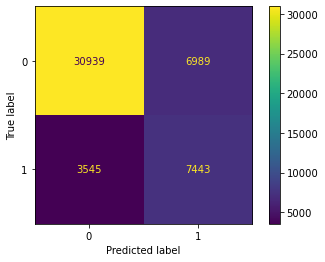

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

## Precison-Recall

In [22]:
from sklearn.metrics import precision_score, recall_score

pr = precision_score(y_test, y_test_pred)
rc = recall_score(y_test, y_test_pred)

print(pr, rc)

0.5157289356984479 0.6773753185293047


# Precision-Recall Curve

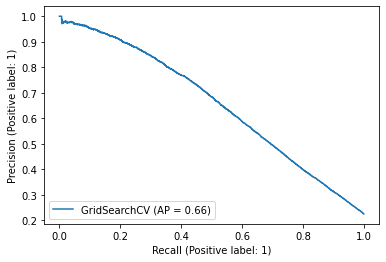

In [23]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf, X_test, y_test)

# ROC curve

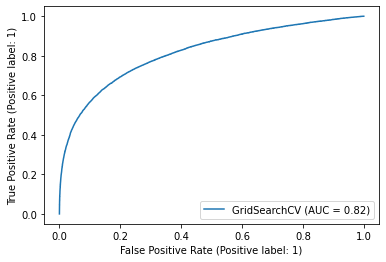

In [24]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)